<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/Week1/Tugas_Week1Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Muat dataset
link = "https://raw.githubusercontent.com/keripikkaneboo/Machine-Learning/refs/heads/main/Week1/Automobile.csv"
data = pd.read_csv(link)

# Definisikan fitur dan target
X = data.drop('symboling', axis=1)
y = data['symboling']

# Kolom numerik dan kategorikal
numeric_features = [
    'price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
    'compression-ratio', 'stroke', 'bore', 'engine-size', 'curb-weight',
    'height', 'width', 'length', 'wheel-base', 'normalized-losses'
]
categorical_features = [
    'fuel-system', 'engine-type', 'body-style', 'make', 'aspiration',
    'fuel-type', 'drive-wheels', 'engine-location', 'num-of-doors', 'num-of-cylinders'
]

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline dengan GridSearchCV
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Latih model dengan GridSearchCV
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Prediksi
y_pred = best_model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Best Params:", grid_search.best_params_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.4s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, reg

Persamaan - persamaan matematika yang digunakan pada MSE, RMSE, dan R-Squared:

1. MSE mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Semakin kecil nilai MSE, semakin baik model.
Rumus MSE:
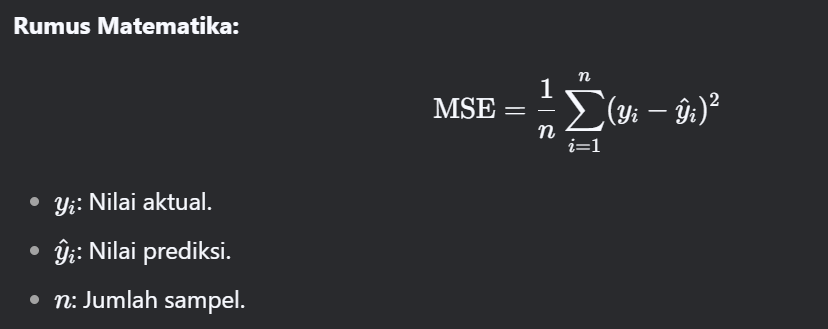

2. RMSE adalah akar kuadrat dari MSE. Ini memberikan gambaran tentang seberapa besar kesalahan prediksi dalam skala yang sama dengan variabel target.
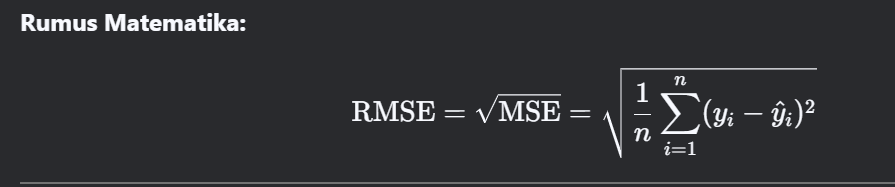
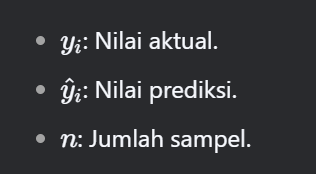

3. R-squared mengukur seberapa baik variabilitas variabel target dapat dijelaskan oleh model. Nilainya berkisar antara 0 dan 1, di mana 1 menunjukkan model yang sempurna.
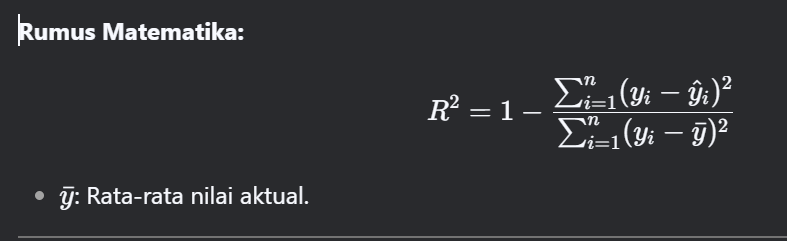